<div style="border: 2px solid #1E90FF; padding: 20px; margin: 20px; text-align: center;">
  <h1 style="color: #1E90FF; font-family: Arial, sans-serif;">Assignment 2: Simplicial complexes and topological invariants </h1>
  <h2 style="color: #28a745; font-family: Arial, sans-serif;"><strong>Name:</strong> Jean Aime IRAGUHA</h2>
  <h3 style="color: #dc3545; font-family: Arial, sans-serif;"><strong>Course:</strong> Topological Data Analysis </h3>
</div>


<h2 style="color: blue; font-family: Arial, sans-serif;"> Introduction </h2>

This assignment explores the concept of simplicial complexes and key topological invariants, with a focus on the Euler characteristic. We will examine the triangulation of alphabetic letters based on their homeomorphism classes, providing insight into their topological structures. Additionally, the assignment will involve analyzing the Euler characteristics of various topological spaces to deepen our understanding of their properties.


In [3]:
# importing useful library for simplicial complexes 
import gudhi 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools

In [4]:
def PrintSimplices(simpcomplex):
    '''
    Print a list of the simplices of the simplicial complex 'simpcomplex'.
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        
    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        PrintSimplices(simpcomplex)
    '''
    simplices = {i:[] for i in range(simpcomplex.dimension()+1)}
    for filtration in simpcomplex.get_simplices():
        simplex = filtration[0]
        simplices[len(simplex)-1].append(simplex)
    print('The simplicial complex contains the following simplices: ')
    for i in range(simpcomplex.dimension()+1):
        print('Dimension '+repr(i)+': ', end="")
        print(*simplices[i], sep = ", ")
        
def DrawSimplicialComplex(simpcomplex, pos=None):
    '''
    Draw the 1-skeleton of the simplicial complex 'simpcomplex', in the plane.
    If 'pos==None', the position of the vertices are chosen at random, according to the 'spring_layout' of networkx.
    If pos is a dict 
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        pos: a dict {(vertex of simpcomplex): (list of floats of length 2) }
        
    Example 1:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        DrawSimplicialComplex(simpcomplex)

    Example 2:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        pos = {0:[0,0], 1:[0,1]}
        DrawSimplicialComplex(simpcomplex, pos=pos)
    '''
    nodes=[]; edges=[]
    for filtr in simpcomplex.get_skeleton(1):
        simplex = filtr[0]
        if len(simplex)==1:
            nodes.append(simplex[0])
        if len(simplex)==2:
            edges.append(simplex)
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    if pos == None:
        pos = nx.spring_layout(G)
    nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_color='magenta')
    
def NumberOfConnectedComponents(simpcomplex, verbose = 'True'):
    '''
    Print the number of connected components of the simplicial complex 'simpcomplex'.
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        
    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        NumberOfConnectedComponents(simpcomplex)
    '''    
    simpcomplex.compute_persistence()
    nbr_components = simpcomplex.betti_numbers()[0]
    if verbose: print('The simplicial complex admits '+repr(nbr_components)+' connected component(s).')
    return nbr_components

def EulerCharacteristic(simpcomplex, verbose = 'True'):
    '''
    Print the Euler characteristic of the simplicial complex 'simpcomplex'.
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        
    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        EulerCharacteristic(simpcomplex)
    '''
    num_simplices = [0 for i in range(simpcomplex.dimension()+1)]
    for filtration in simpcomplex.get_simplices():
        simplex = filtration[0]
        num_simplices[len(simplex)-1]+=1
    Euler_characteristic = sum(num_simplices[::2]) - sum(num_simplices[1::2])
    if verbose: print('The simplicial complex has Euler characteristic equal to '+repr(Euler_characteristic)+'.')
    return Euler_characteristic

## Triangulation of the circle

We start by considering a simplicial complex $S$ that is a triangulation of the circle.
It is given by:
- three vertices: $0$,$1$ and $2$,
- three edges: $[0,1]$, $[1,2]$ and $[2,0]$.


In [7]:
# We build a SimplexTree structure on gudhi

simpcomplex = gudhi.SimplexTree()
print(simpcomplex)

In [8]:
# We add the vertices

simpcomplex.insert([0])
simpcomplex.insert([1])
simpcomplex.insert([2])

True

In [9]:
# Let us verify that the vertices are correctly added

PrintSimplices(simpcomplex)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]


In [10]:
# We add the edges

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,0])

True

In [11]:
# Let us verify that the edges are correctly added

PrintSimplices(simpcomplex)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]


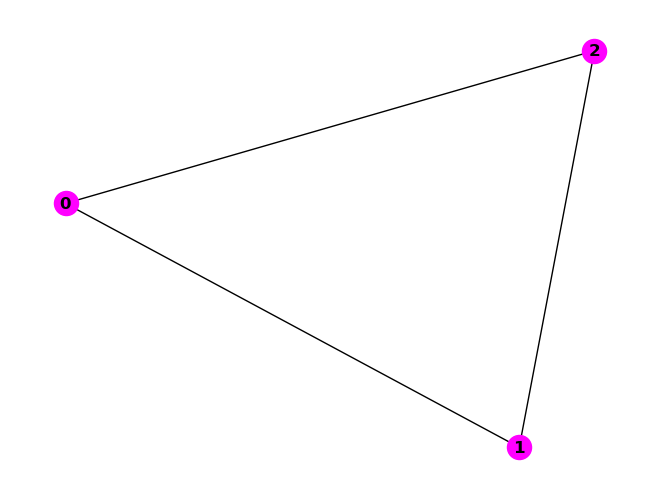

In [12]:
# The following function allows to draw the simplicial complex (uses the library networkx)

DrawSimplicialComplex(simpcomplex)

In [13]:
# In Gudhi, if a simplex is added to the complex, then all its faces are
# Hence we can use the simpler code:

simpcomplex2 = gudhi.SimplexTree()

simpcomplex2.insert([0,1])
simpcomplex2.insert([1,2])
simpcomplex2.insert([2,0])

PrintSimplices(simpcomplex2)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]


In [14]:
# We can do it even faster, by using the remove_maximal_simplex function:

simpcomplex3 = gudhi.SimplexTree()

simpcomplex3.insert([0,1,2])
simpcomplex3.remove_maximal_simplex([0,1,2])

PrintSimplices(simpcomplex3)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]


In [15]:
# be careful

#simpcomplex3.remove_maximal_simplex([0])

## Computing topological invariants

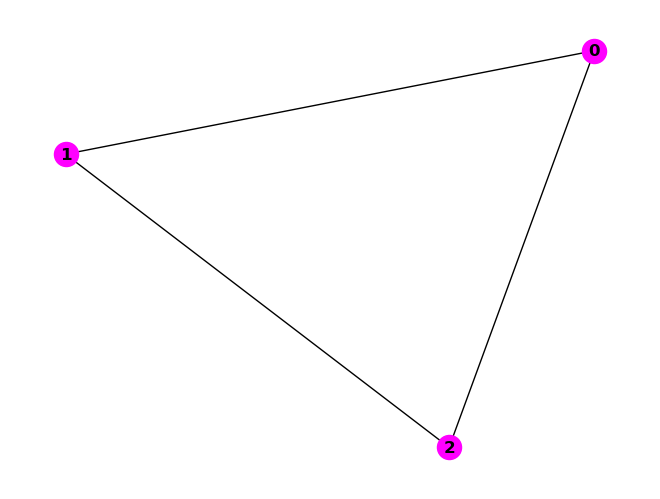

In [17]:
simpcomplexdim2 = gudhi.SimplexTree()

simpcomplexdim2.insert([0,1,2])

DrawSimplicialComplex(simpcomplexdim2)

In [18]:
# The following function returns the number of connected components of the complex.
# Use verbose = 'True' or verbose = 'False' to print the output sentence.

NumberOfConnectedComponents(simpcomplex, verbose = True)

The simplicial complex admits 1 connected component(s).


1

In [19]:
# The following function returns the Euler characteristic of the complex.
# Use verbose = 'True' or verbose = 'False' to print the output sentence.

EulerCharacteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to 0.


0

 <h1 style="color: #1E90FF; font-family: Arial, sans-serif;">Assignment  Part </h1>

# Exercise 22

Build triangulations of the alphabet letters, and compute their Euler characteristic.

Given two letters that are homotopy equivalent, is it true thar their Euler characteristic are equal?
Given two letters that are not homotopy equivalent, is it true thar their Euler characteristic are different?

#### Relationship between Euler characteristics and homotopy
If two spaces are homotopy equivalent, their Euler characteristics are always equal. However, if two spaces are not homotopy equivalent, it does not guarantee that their Euler characteristics are different, as non-homotopy equivalent spaces can still have the same Euler characteristic. The Euler characteristic is a coarse invariant and may not distinguish all types of topological differences.

Since the letter **A** and **R** are homeomorphic they have the same triangulation

## Triangulation of **A** and **R**

The simplicial complex has Euler characteristic equal to 0.


0

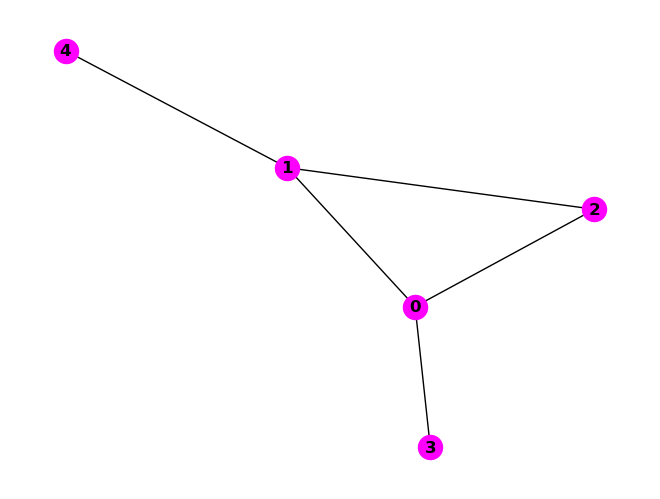

In [25]:
# We build a triangulation of the letter A & R

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,0])
simpcomplex.insert([3,0])
simpcomplex.insert([4,1])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

Since the letter **D** and **O** are homeomorphic they have the same triangulation

## Triangulation of **D** and **O**

The simplicial complex has Euler characteristic equal to 0.


0

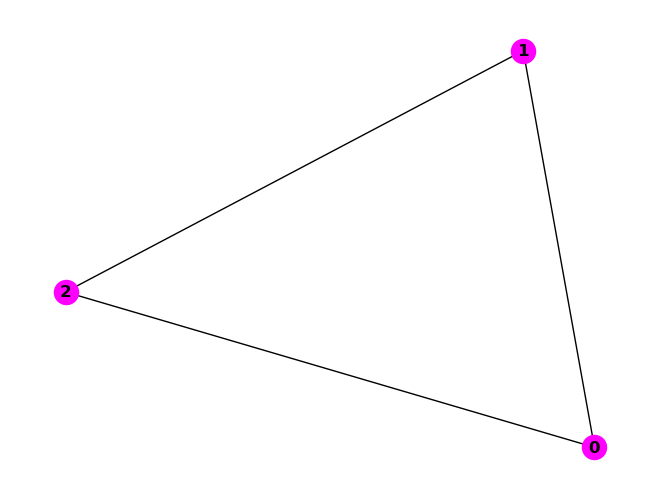

In [27]:
# We build a triangulation of the letter D & O

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([0,2])
simpcomplex.insert([1,2])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

Since the letter **C, G, I, J, L, M, N, S, U, V, W** and **Z** are homeomorphic they have the same triangulation

## Triangulation of **C, G, I, J, L, M, N, S, U, V, W** and **Z**

The simplicial complex has Euler characteristic equal to 1.


1

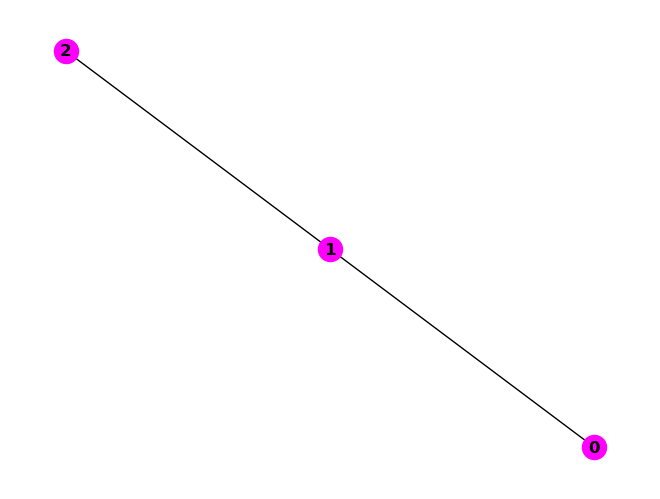

In [29]:
# We build a triangulation of the letter  C, G, I, J, L, M, N, S, U, V, W and Z

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)


## Triangulation of **B** 

The simplicial complex has Euler characteristic equal to -1.


-1

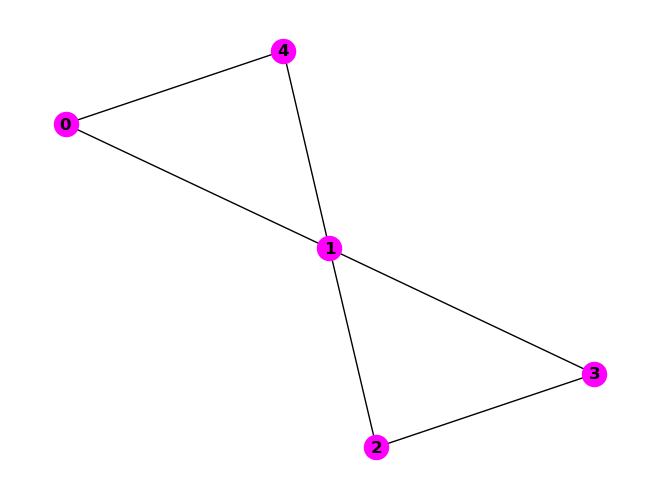

In [31]:
# We build a triangulation of the letter B

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([2,1])
simpcomplex.insert([3,2])
simpcomplex.insert([1,3])
simpcomplex.insert([4,1])
simpcomplex.insert([4,0])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

Since the letter **E,F,T** and **Y** are homeomorphic they have the same triangulation

## Triangulation  Of letter **E,F,T** and **Y** 

The simplicial complex has Euler characteristic equal to 1.


1

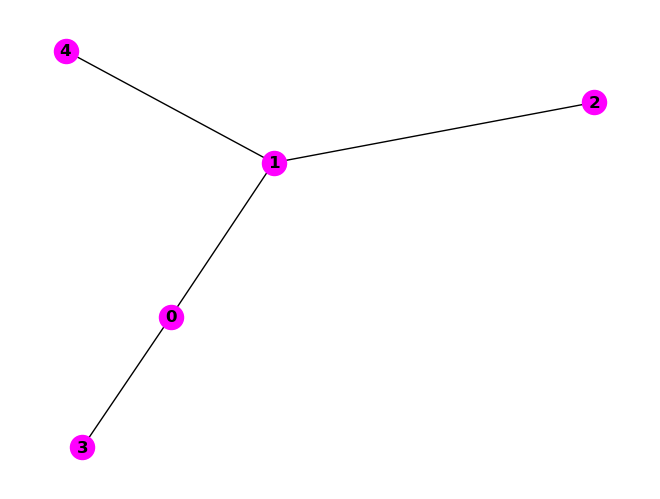

In [33]:
# We build a triangulation of the letter E,F,T and Y

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([0,3])
simpcomplex.insert([1,2])
simpcomplex.insert([1,4])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

Since the letter **H** and **K** are homeomorphic they have the same triangulation

## Triangulation  Of letter **H** and **K** 

The simplicial complex has Euler characteristic equal to 1.


1

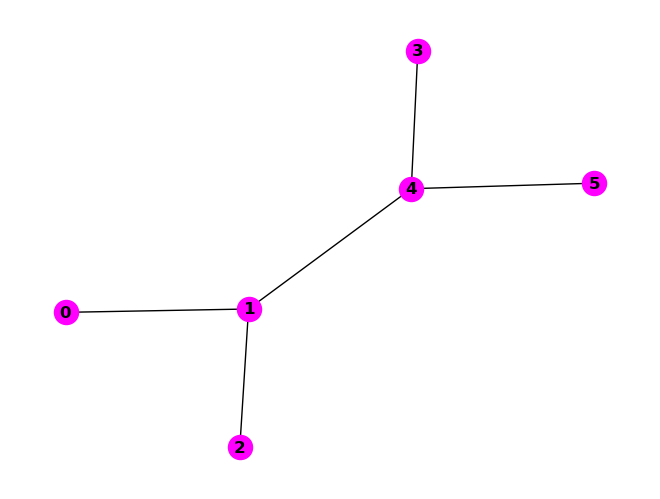

In [35]:
# We build a triangulation of the letter H and K

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([4,1])
simpcomplex.insert([3,4])
simpcomplex.insert([5,4])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)



## Triangulation  Of letter **P** 

The simplicial complex has Euler characteristic equal to 0.


0

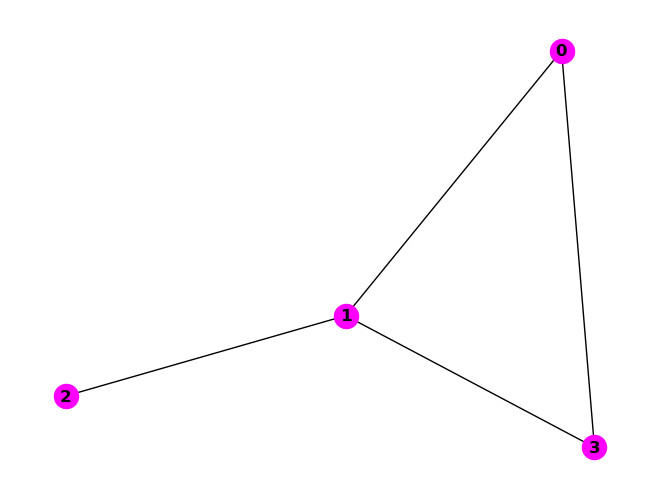

In [37]:
# We build a triangulation of the letter P

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([3,0])
simpcomplex.insert([3,1])


DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

## Triangulation Of letter **Q**

The simplicial complex has Euler characteristic equal to 0.


0

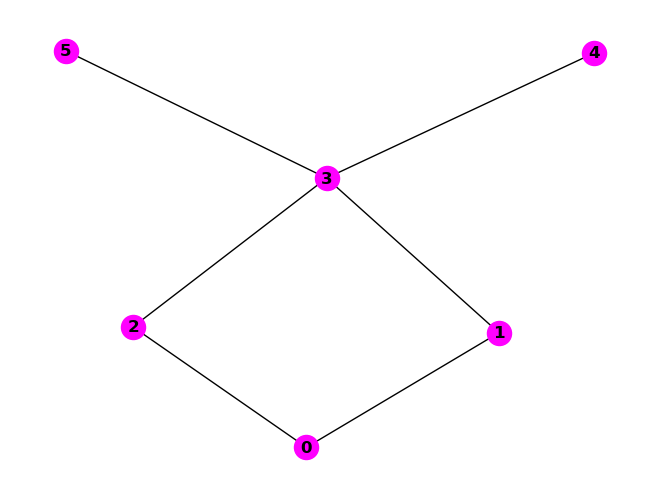

In [39]:
# We build a triangulation of the letter Q

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,3])
simpcomplex.insert([3,2])
simpcomplex.insert([0,2])
simpcomplex.insert([5,3])
simpcomplex.insert([4,3])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

## Triangulation Of letter **X**

The simplicial complex has Euler characteristic equal to 1.


1

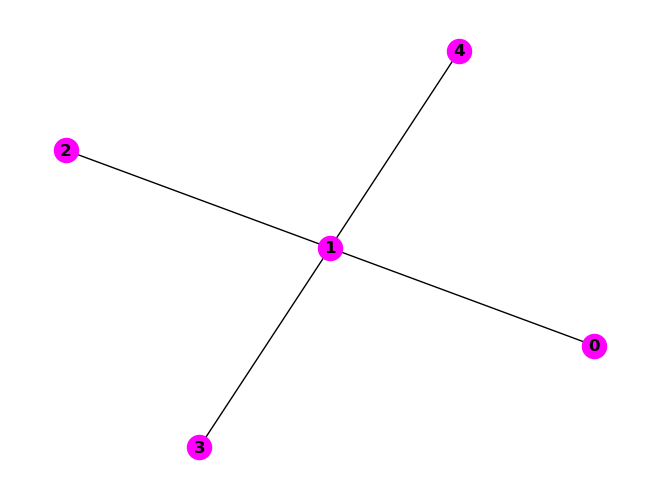

In [41]:

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([1,3])
simpcomplex.insert([1,4])


DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

# Exercise 23

For every $n$, triangulate the bouquet of $n$ circles. Compute their Euler characteristic. 

In [44]:
def bouquet_circle(n: int, draw=False, verbose=False): 
    """
    Creates a bouquet of circles simplicial complex and calculates its Euler characteristic.

    Args:
    n (int): The number of circles in the bouquet.
    draw (bool, optional): If True, the simplicial complex will be drawn. Default is False.
    verbose (bool, optional): If True, additional details about the Euler characteristic calculation will be printed. Default is False.

    Returns:
    float: The Euler characteristic of the bouquet of circles.
    """
    
    # Initialize an empty simplicial complex
    simpcomplex = gudhi.SimplexTree()
    
    # Insert simplices corresponding to the bouquet of circles
    for i in range(n): 
        simpcomplex.insert([0, 2*i + 1])      # Insert the edge between vertex 0 and 2*i+1
        simpcomplex.insert([0, 2*i + 2])      # Insert the edge between vertex 0 and 2*i+2
        simpcomplex.insert([2*i + 1, 2*i + 2]) # Insert the edge between vertex 2*i+1 and 2*i+2
    
    # Draw the simplicial complex if required
    if draw: 
        DrawSimplicialComplex(simpcomplex)
    
    # Calculate and return the Euler characteristic
    e = EulerCharacteristic(simpcomplex, verbose=verbose)
    return e


In [45]:
for n in range(20):
    e = bouquet_circle(n)
    print('The bouquet of {} circles has Euler characteristc {}'.format(n,e))


The bouquet of 0 circles has Euler characteristc 0
The bouquet of 1 circles has Euler characteristc 0
The bouquet of 2 circles has Euler characteristc -1
The bouquet of 3 circles has Euler characteristc -2
The bouquet of 4 circles has Euler characteristc -3
The bouquet of 5 circles has Euler characteristc -4
The bouquet of 6 circles has Euler characteristc -5
The bouquet of 7 circles has Euler characteristc -6
The bouquet of 8 circles has Euler characteristc -7
The bouquet of 9 circles has Euler characteristc -8
The bouquet of 10 circles has Euler characteristc -9
The bouquet of 11 circles has Euler characteristc -10
The bouquet of 12 circles has Euler characteristc -11
The bouquet of 13 circles has Euler characteristc -12
The bouquet of 14 circles has Euler characteristc -13
The bouquet of 15 circles has Euler characteristc -14
The bouquet of 16 circles has Euler characteristc -15
The bouquet of 17 circles has Euler characteristc -16
The bouquet of 18 circles has Euler characteristc -

## Plot  example at n= 6

N is equal to 6
The simplicial complex has Euler characteristic equal to -5.


-5

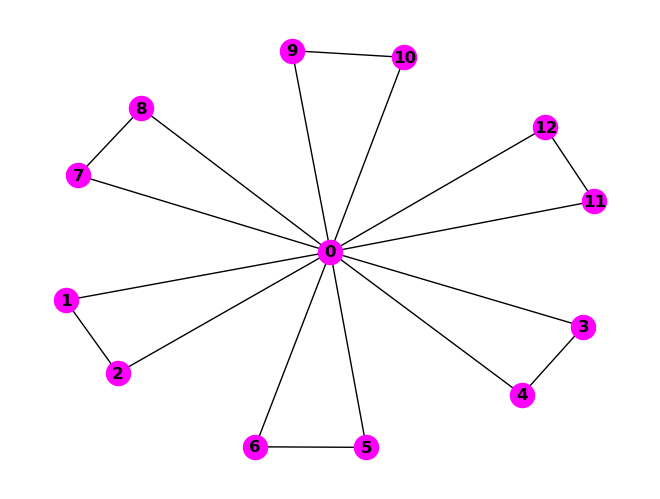

In [47]:
 n = 6

sc = gudhi.SimplexTree()

sc.insert([0])

for i in range(n):
    sc.insert([0, 2*i+1])
    sc.insert([0, 2*i+2])
    sc.insert([2*i+1, 2*i+2])
    
DrawSimplicialComplex(sc)

print('N is equal to '+repr(n))
EulerCharacteristic(sc)

## Simplicial complex plot for n= 8

N is equal to 8
The simplicial complex has Euler characteristic equal to -7.


-7

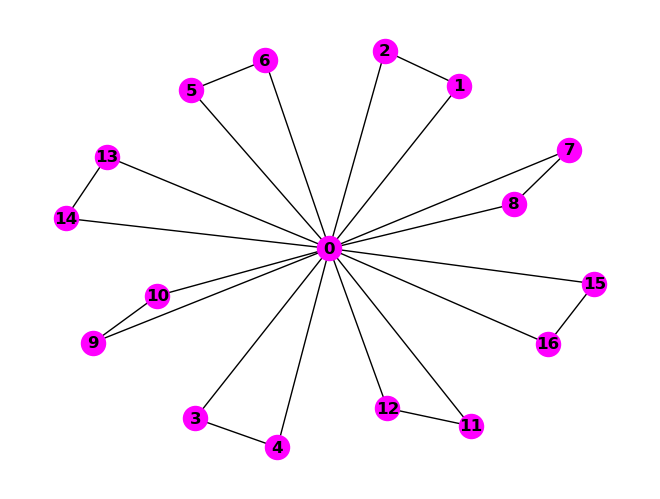

In [49]:
 n = 8

sc = gudhi.SimplexTree()

sc.insert([0])

for i in range(n):
    sc.insert([0, 2*i+1])
    sc.insert([0, 2*i+2])
    sc.insert([2*i+1, 2*i+2])
    
DrawSimplicialComplex(sc)

print('N is equal to '+repr(n))
EulerCharacteristic(sc)

# Exercise 24

Implement the triangulation of the torus given in the notes.
Compute its Euler characteristic.

The simplicial complex has Euler characteristic equal to 0.


0

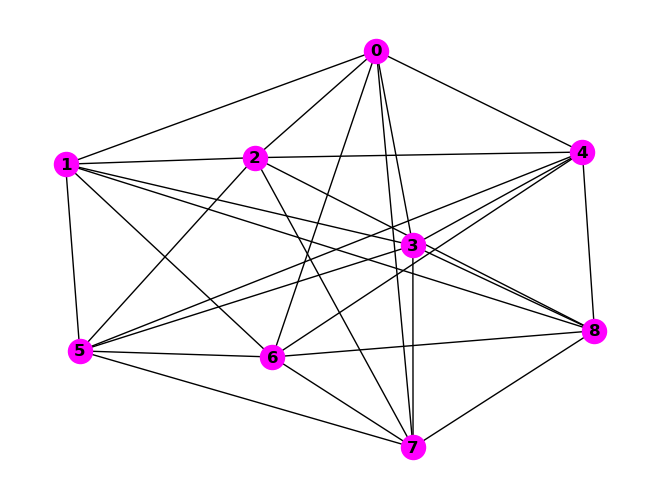

In [52]:
torus = gudhi.SimplexTree()

torus.insert([0,3,7])
torus.insert([0,2,7])
torus.insert([2,7,5])
torus.insert([2,1,5])
torus.insert([1,5,3])
torus.insert([1,0,3])

torus.insert([3,4,8])
torus.insert([3,7,8])
torus.insert([7,8,6])
torus.insert([7,5,6])
torus.insert([5,6,4])
torus.insert([5,4,3])

torus.insert([4,0,2])
torus.insert([4,2,8])
torus.insert([8,2,1])
torus.insert([8,1,6])
torus.insert([6,1,0])
torus.insert([6,4,0])

DrawSimplicialComplex(torus)
EulerCharacteristic(torus)

# Exercise 25

Consider the following dataset of $30$ points $x_0, ..., x_{29}$ in $\mathbb{R}^2$:
 ``` 
 {0: [0.29409772548731694, 0.6646626625013836],
 1: [0.01625840776679577, 0.1676405753593595],
 2: [0.15988905150272759, 0.6411323760808338],
 3: [0.9073191075894482, -0.16417982219713312],
 4: [-0.18661467838673884, 0.31618948583046413],
 5: [-0.3664040542098381, 0.9098590694955988],
 6: [-0.43753448716144905, -0.8820102274699417],
 7: [0.4096730199915961, -0.23801426675264126],
 8: [0.5903822103474676, -0.7285102954232894],
 9: [0.9133851839417766, -0.6606557328320093],
 10: [-0.15516122940597588, 0.7565411235103017],
 11: [-0.38626186295039866, -0.3662321656058476],
 12: [0.005209710070218199, 0.27655964872153116],
 13: [0.670078068894711, -0.00932202688834849],
 14: [-0.011268465716772091, 0.24340880308017376],
 15: [-0.6441978411451603, -0.9672635759413206],
 16: [-0.2841794022401025, -0.6734801188906114],
 17: [-0.15473260248990717, -0.1365357396855129],
 18: [0.7177096105982121, 0.9378197891592468],
 19: [-0.4677068504994166, 0.1533930130294956],
 20: [-0.32379909116817096, 0.9694800649768063],
 21: [-0.2886940472879451, -0.039544695812395725],
 22: [-0.5900701743351606, 0.8350804500575086],
 23: [0.14931959728335853, 0.869106793774487],
 24: [-0.14500672678238824, -0.3170082291070364],
 25: [0.07324547392476122, 0.6653572287065117],
 26: [-0.662990048258566, 0.1908198608241125],
 27: [-0.25641262456436276, -0.9844196180941553],
 28: [-0.5105685407819842, -0.4236604017060557],
 29: [0.6792549581008038, -0.026215820387260003]}
 ``` 
 
 Write a function that takes as an input a parameter $r\geq 0$, and returns the simplicial complex $\mathcal{G}(r)$ defined as follows:
- the vertices of $\mathcal{G}(r)$ are the points $x_0, ..., x_{29}$,
- for all $i, j \in [0,29]$ with $i\neq j$, the edge $[i,j]$ belongs to $\mathcal{G}(r)$ if and only if $||x_i-x_j||\leq r$.

Compute the number of connected components of $\mathcal{G}(r)$ for several values of $r$. What do you observe?

In [55]:
points = {0: [0.29409772548731694, 0.6646626625013836],
          1: [0.01625840776679577, 0.1676405753593595],
          2: [0.15988905150272759, 0.6411323760808338],
          3: [0.9073191075894482, -0.16417982219713312],
          4: [-0.18661467838673884, 0.31618948583046413],
          5: [-0.3664040542098381, 0.9098590694955988],
          6: [-0.43753448716144905, -0.8820102274699417],
          7: [0.4096730199915961, -0.23801426675264126],
          8: [0.5903822103474676, -0.7285102954232894],
          9: [0.9133851839417766, -0.6606557328320093],
          10: [-0.15516122940597588, 0.7565411235103017],
          11: [-0.38626186295039866, -0.3662321656058476],
          12: [0.005209710070218199, 0.27655964872153116],
          13: [0.670078068894711, -0.00932202688834849],
          14: [-0.011268465716772091, 0.24340880308017376],
          15: [-0.6441978411451603, -0.9672635759413206],
          16: [-0.2841794022401025, -0.6734801188906114],
          17: [-0.15473260248990717, -0.1365357396855129],
          18: [0.7177096105982121, 0.9378197891592468],
          19: [-0.4677068504994166, 0.1533930130294956],
          20: [-0.32379909116817096, 0.9694800649768063],
          21: [-0.2886940472879451, -0.039544695812395725],
          22: [-0.5900701743351606, 0.8350804500575086],
          23: [0.14931959728335853, 0.869106793774487],
          24: [-0.14500672678238824, -0.3170082291070364],
          25: [0.07324547392476122, 0.6653572287065117],
          26: [-0.662990048258566, 0.1908198608241125],
          27: [-0.25641262456436276, -0.9844196180941553],
          28: [-0.5105685407819842, -0.4236604017060557],
          29: [0.6792549581008038, -0.026215820387260003]}

In [131]:
def Graph_dataset(r):
    """function that takes as an input a parameter r and returns the simplicial complex G(r)"""
    s = gudhi.SimplexTree()
    for i in range(30):
        s.insert([i])

    for i in range(30):
        for j in range(i):
            if (points[i][0]-points[j][0])**2+(points[i][1]-points[j][1])**2<=r:
                s.insert([i,j])

    DrawSimplicialComplex(s, points)

    NumberOfConnectedComponents(s)

The simplicial complex admits 16 connected component(s).


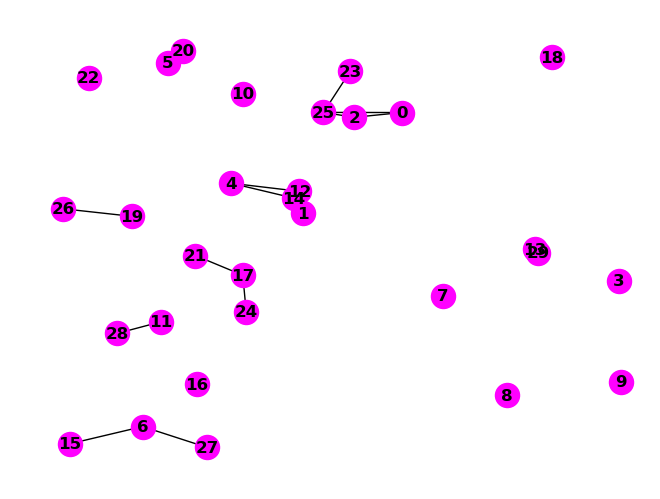

In [133]:
Graph_dataset(r=0.05)

The simplicial complex admits 9 connected component(s).


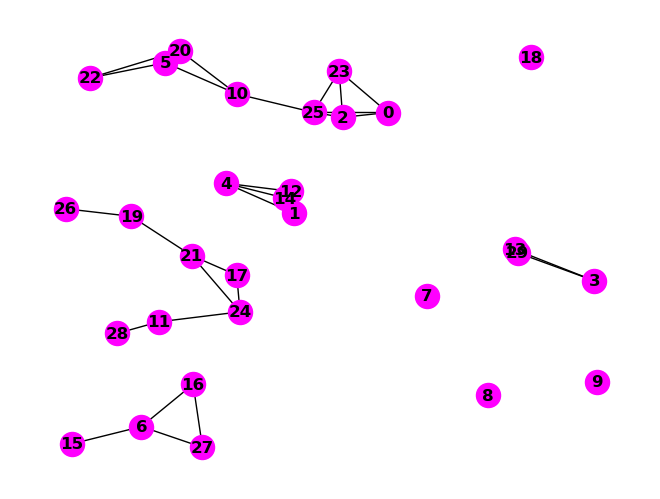

In [135]:
Graph_dataset(r=0.1)

The simplicial complex admits 1 connected component(s).


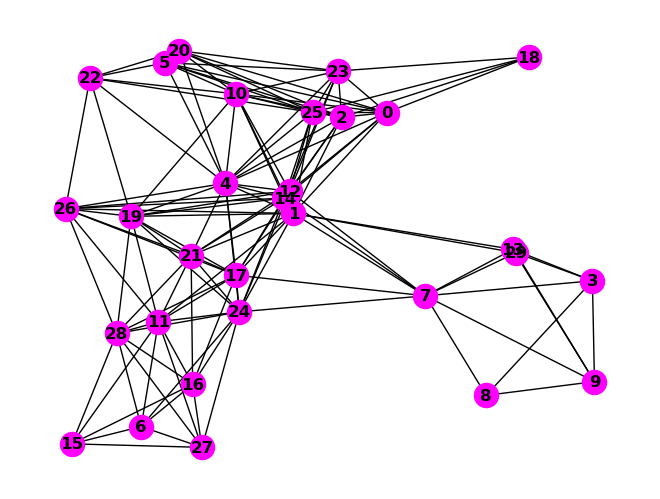

In [137]:
Graph_dataset(r=0.5)

The simplicial complex admits 1 connected component(s).


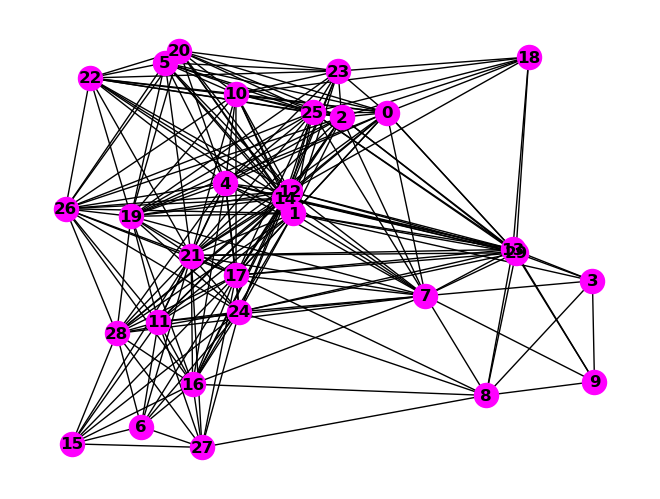

In [139]:
Graph_dataset(r=1)

## Observations
As pattern we can observe that as parameter r is going closer to 1 the number of connected point is sligtly decreasing.

**The following is the code that generate graph to view well the pattern**

In [62]:
# calculates the norm between two lists
norm2 = lambda l1, l2: (l1[0] - l2[0])**2 + (l1[1] - l2[1])**2 


def simplical_complex(r): 
    
    assert r >= 0
    
    G = gudhi.SimplexTree()
    for i in range(30): 
        G.insert([i])
        for j in range(i+1, 30): 
            if norm2(points[i], points[j]) <= r**2: 
                G.insert([i,j])
    return G

r_values = np.linspace(0.02,1,1000)
c = np.zeros(1000)
for i, r in enumerate(r_values):
    G = simplical_complex(r)
    c[i] = NumberOfConnectedComponents(G, verbose = False)

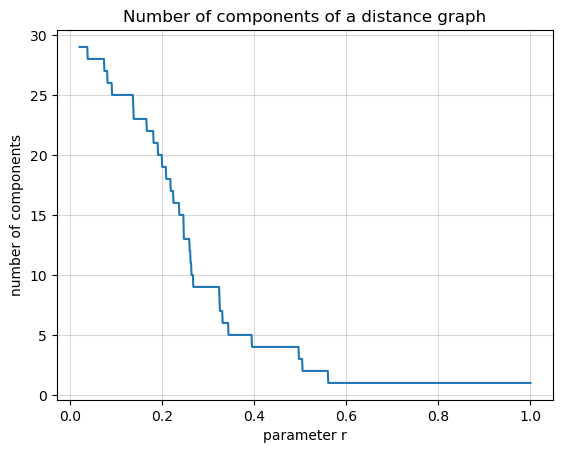

In [63]:
plt.plot(r_values, c)
plt.grid(alpha = 0.5)
plt.xlabel('parameter r')
plt.ylabel('number of components')
plt.title('Number of components of a distance graph')
plt.show()


# Exercise 26

A *Erdős–Rényi random graph $\mathcal{G}(n,p)$* is a simplicial complex obtained as follows:
- add $n$ vertices $1,...,n$,
- add each edge $[a,b]$, where $a,b \in [1,n]$, to the complex with probability $p$.

Builds a function that, given $n$ and $p$, outputs a simplicial complex $\mathcal{G}(n,p)$.
Observe the influence of $p$ on the number of connected components of $\mathcal{G}(10,p)$ and $\mathcal{G}(100,p)$.

*Hint:* If $V$ is a list, `itertools.combinations(V,2)` can be used to generate all the non-ordered pairs `[a,b]` in `V` (package `itertools`).
The command `random.random()` can be used to generate a random number between 0 and 1, and `random.random()<p` is  `True` with probability  `p` (package `random`).

In [82]:
import itertools
import random

In [84]:
def Graph_erdos(n,p):
    V = list(range(n))
    simpcomplex = gudhi.SimplexTree()
    for i in range(n):
        simpcomplex.insert([i])
    for v in itertools.combinations(V,2):
        if random.random()<p:
            simpcomplex.insert(list(v))

    EulerCharacteristic(simpcomplex)
    NumberOfConnectedComponents(simpcomplex)
    DrawSimplicialComplex(simpcomplex)

The simplicial complex has Euler characteristic equal to 0.
The simplicial complex admits 3 connected component(s).


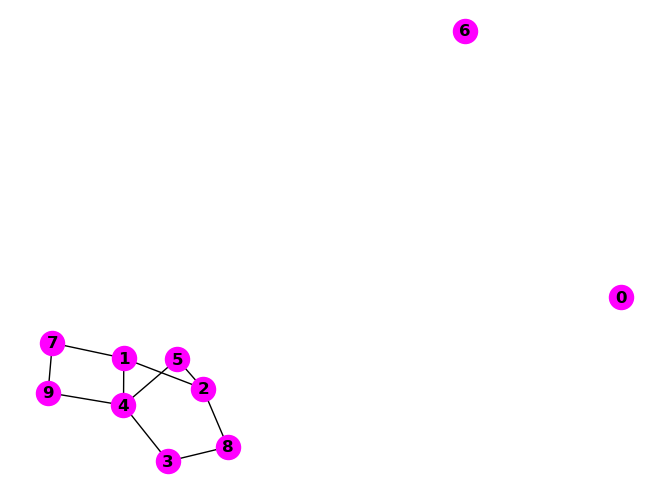

In [86]:
Graph_erdos(n=10,p=0.2)

The simplicial complex has Euler characteristic equal to -1.
The simplicial complex admits 1 connected component(s).


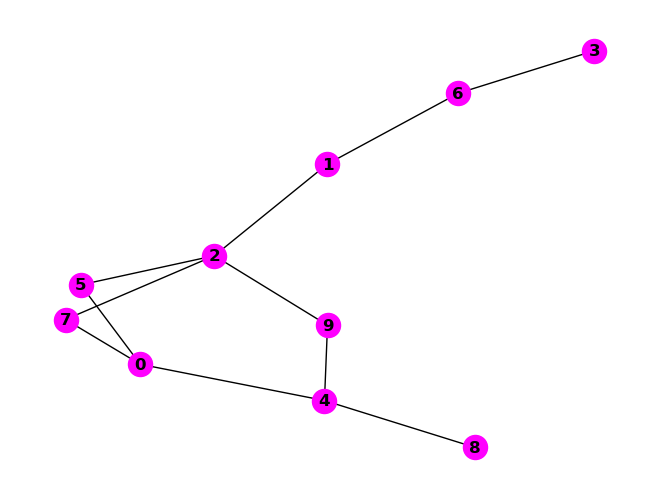

In [88]:
Graph_erdos(n=10,p=0.2)

The simplicial complex has Euler characteristic equal to -865.
The simplicial complex admits 1 connected component(s).


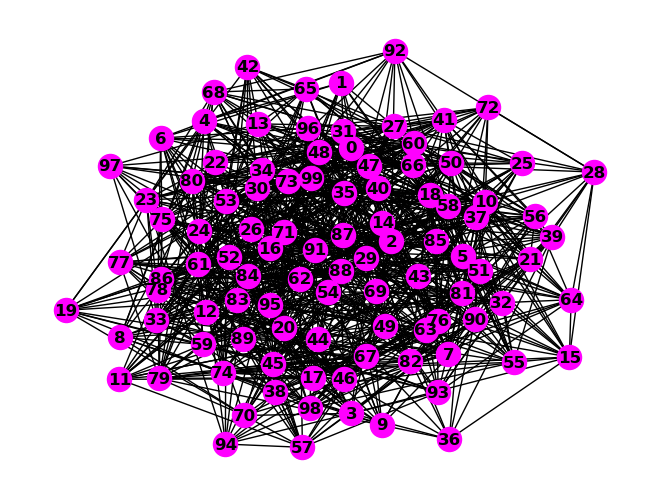

In [90]:
Graph_erdos(n=100,p=0.2)

In [92]:
ro = np.random.RandomState(1000)
def erdos_renyi(n: int, p: float):
    
    assert 0 <= p <= 1
    
    V = []
    G = gudhi.SimplexTree()
    for i in range(n):
        V.append(i+1)
        G.insert([i+1])
    
    edges_added = 0
    for edge in itertools.combinations(V,2): 
        if ro.uniform() < p: 
            G.insert(edge)
            edges_added += 1
            
    return G, edges_added

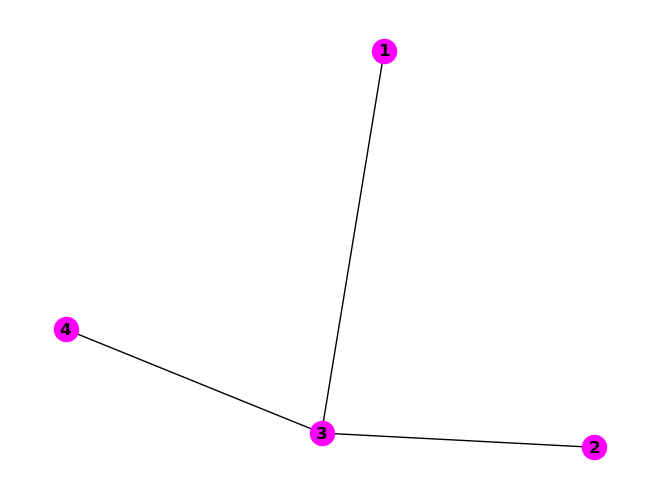

In [94]:
G, edges_added = erdos_renyi(4,0.5)
DrawSimplicialComplex(G)

## Ploting the summury for the parttern

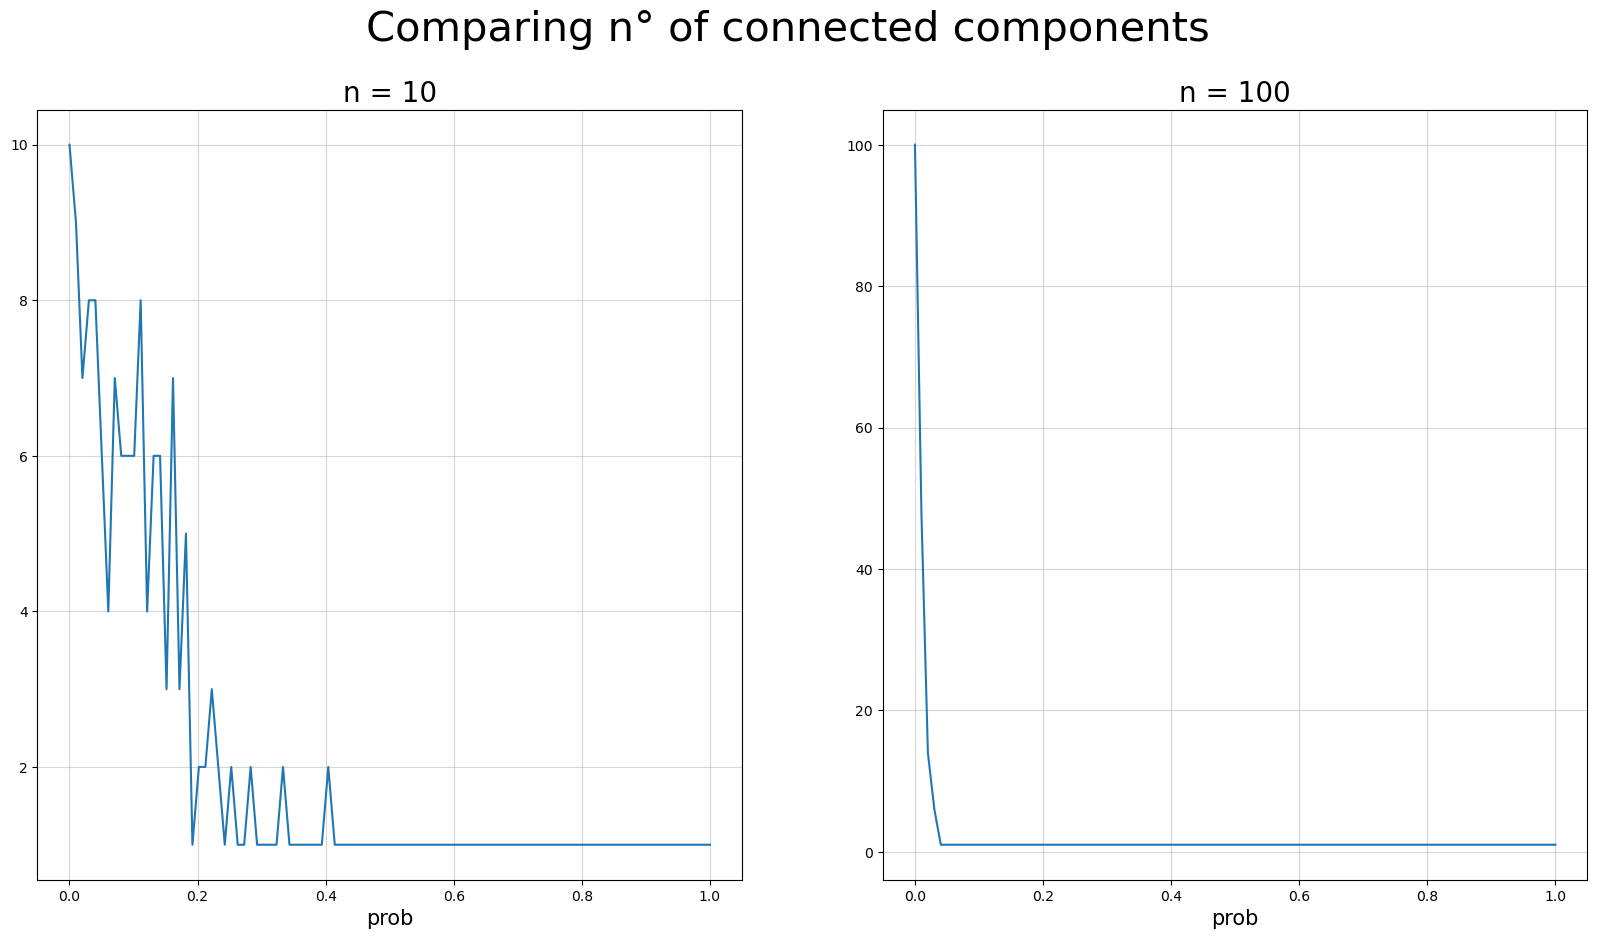

In [128]:
import matplotlib.pyplot as plt
import numpy as np

# Create 1 row and 2 columns of subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharex=True)
fig.suptitle(r'Comparing n° of connected components', fontsize=30)

# Set labels correctly
ax[0].set_xlabel('prob', fontsize=15)
ax[1].set_xlabel('prob', fontsize=15)

def plot_erdos(n, j):
    """
    Plots the number of connected components in an Erdős-Rényi graph as a function of edge creation probability.

    Parameters:
    n (int): Number of nodes in the graph.
    j (int): Index for the subplot (0 or 1).
    """
    p_values = np.linspace(0, 1, 100)
    c = np.zeros(100)
    
    for i, p in enumerate(p_values):
        G, edges_added = erdos_renyi(n, p)
        c[i] = n if edges_added == 0 else NumberOfConnectedComponents(G, verbose=False)
    
    ax[j].plot(p_values, c)
    ax[j].grid(alpha=0.5)
    ax[j].set_title(f'n = {n}', fontsize=20)

# Plot on the correct subplots
plot_erdos(10, j=0)
plot_erdos(100, j=1)


#### Comment on Exercises 26
In this exercise, we explored the construction of an Erdős–Rényi random graph as a simplicial complex by introducing edges between vertices with a given probability (p). 
By implementing a function that generates this random graph for specified values of n (number of vertices) and p (edge probability), 
we observed how varying p significantly impacts the structure of the graph.

Specifically, for lower values of p, the graph tends to have more disconnected components, 
while higher values of p lead to increased connectivity and fewer components. 
This experiment effectively demonstrated the relationship between edge probability and the number of connected components, 
highlighting how randomness influences topological properties in graph theory and simplicial complexes.



<h2 style="color: blue; font-family: Arial, sans-serif;"> Conclusion of the Assignment </h2>
In conclusion, this assignment provided an in-depth exploration of simplicial complexes and key topological invariants, particularly the Euler characteristic. By examining the triangulation of alphabetic letters through the lens of homeomorphism classes, we gained valuable insights into their topological structures. Additionally, the analysis of Euler characteristics across various topological spaces deepened our understanding of how these invariants capture essential properties of shapes and spaces. This comprehensive study not only reinforced foundational concepts in algebraic topology but also highlighted their practical applications in Topological Data Analysis (TDA).